In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from IPython.display import Image
from google.colab import files

In [2]:
# Load the dataset
myfile = files.upload()
path = pd.read_csv('voice.csv')
df = pd.DataFrame(path)

Saving voice.csv to voice.csv


# 1. Data Preprocessing

In [3]:
# Select features and target variable
X = df.loc[:, ['meanfun', 'IQR', 'minfun', 'sfm', 'sp.ent', 'modindx', 'kurt']]
y = df['label']

# Encode target variable
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Scale the features
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

# 2. Logistic Regression

In [4]:
# Train Logistic Regression
LR = LogisticRegression(solver = 'liblinear', multi_class = 'ovr', random_state = 1)
LR.fit(X_train_std,y_train)

# Predictions on training and test sets
y_train_pred = LR.predict(X_train_std)
y_test_pred = LR.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(LR.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(LR.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.970
Test set accuracy : 0.968
[[299  12]
 [  8 315]]


In [5]:
# Cross-validation scores
scores = cross_val_score(LR, X_train_std, y_train, cv = 3)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 4)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 5)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 6)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 7)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 8)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 9)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(LR, X_train_std, y_train, cv = 10)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy score : [0.96923077 0.96213018 0.97156398] 
Decision Tree SV accuracy : 0.968 +/- 0.004
CV accuracy score : [0.97476341 0.96056782 0.96050553 0.9778831 ] 
Decision Tree SV accuracy : 0.968 +/- 0.008
CV accuracy score : [0.97238659 0.96252465 0.9566075  0.97633136 0.97233202] 
Decision Tree SV accuracy : 0.968 +/- 0.007
CV accuracy score : [0.97635934 0.96926714 0.95971564 0.96445498 0.97630332 0.96919431] 
Decision Tree SV accuracy : 0.969 +/- 0.006
CV accuracy score : [0.97513812 0.96961326 0.95856354 0.9640884  0.96961326 0.97513812
 0.96961326] 
Decision Tree SV accuracy : 0.969 +/- 0.005
CV accuracy score : [0.97791798 0.97160883 0.95583596 0.96529968 0.95268139 0.97160883
 0.99050633 0.96835443] 
Decision Tree SV accuracy : 0.969 +/- 0.011
CV accuracy score : [0.9787234  0.97163121 0.96453901 0.95035461 0.97163121 0.96441281
 0.96797153 0.98220641 0.96797153] 
Decision Tree SV accuracy : 0.969 +/- 0.009
CV accuracy score : [0.98031496 0.96850394 0.96850394 0.95669291 0

# 3. Decision Tree

In [6]:
training_accuracy = []
test_accuracy = []

depth_settings = range(1, 10)

# Finding max_depth
for max_depth in depth_settings:

  # Created a model
  dtcMod2 = DecisionTreeClassifier(max_depth = max_depth)
  dtcMod2.fit(X_train_std, y_train)

  # Save traing & test set accuracy
  training_accuracy.append(dtcMod2.score(X_train_std, y_train))
  test_accuracy.append(dtcMod2.score(X_test_std, y_test))

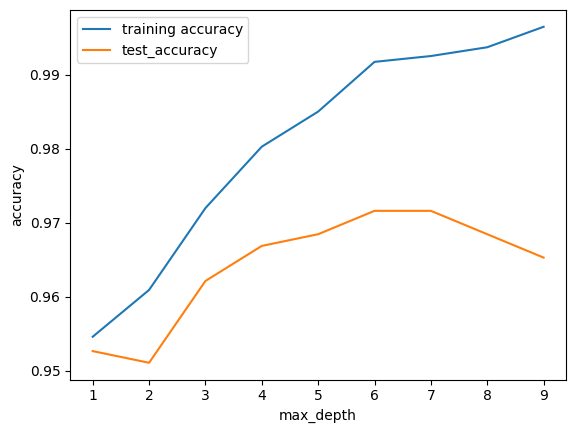

In [7]:
# Plotting
plt.plot(depth_settings, training_accuracy, label = 'training accuracy')
plt.plot(depth_settings, test_accuracy, label = 'test_accuracy')
plt.set_facecolor = 'dark'
plt.xlabel("max_depth")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [8]:
# Grid search for hyperparameter tuning
grid = {'criterion' : ['gini', 'entropy'], 'min_samples_split' : range(1, 10), 'min_samples_leaf' : range(1, 5)}   # Define the hyperparameter grid
dtc = DecisionTreeClassifier(max_depth = 3)   # Create a Decision Tree Classifier with a fixed max_depth for grid search
dtc_cv = GridSearchCV(dtc, grid, cv = 5)   # Initialize GridSearchCV
dtc_cv.fit(X_train_std, y_train)   # Fit the model to the training data

print("hyperparameters tuning: ", dtc_cv.best_params_)
print("accuracy: {:.3f}".format(dtc_cv.best_score_))

hyperparameters tuning:  {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2}
accuracy: 0.964


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 889, in fit
    super().fit(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _valida

In [10]:
# Train Decision Tree
dtc = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4, random_state = 1)
dtc.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = dtc.predict(X_train_std)
y_test_pred = dtc.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(dtc.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(dtc.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.972
Test set accuracy : 0.962
[[300  11]
 [ 13 310]]


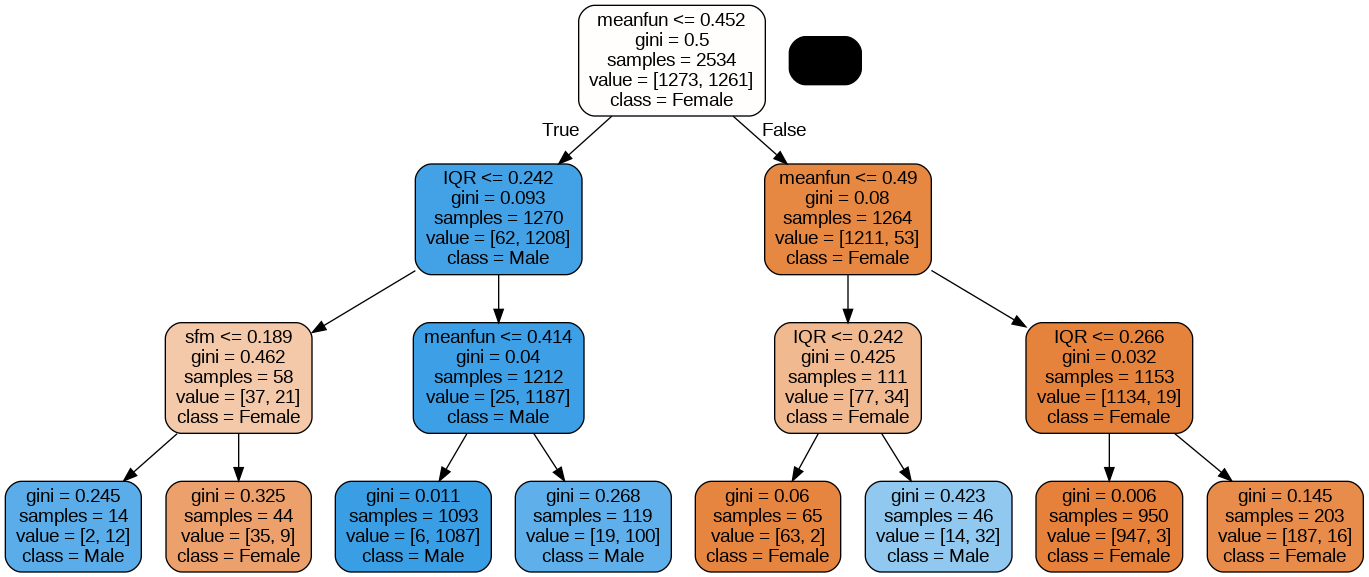

In [11]:
# Visualize Decision Tree
dot_data2 = export_graphviz(dtc, filled = True, rounded = True, class_names = ["Female", "Male"], feature_names = X_train.columns[0:], out_file = None)
graph = graph_from_dot_data(dot_data2)
graph.write_png('tree.png')
Image(graph.create_png())

feature importances:
 [0.93287482 0.05923508 0.         0.0078901  0.         0.
 0.        ]


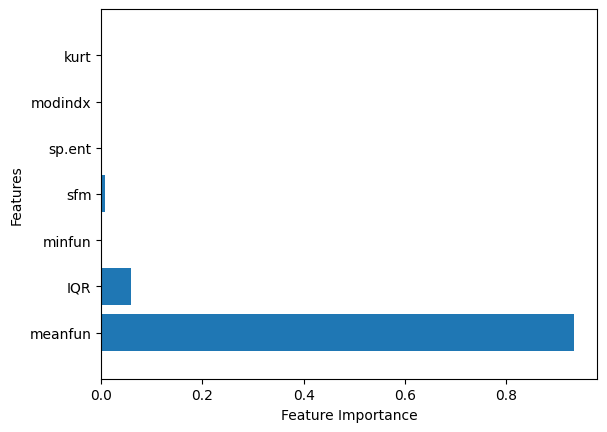

In [12]:
# Plot feature importances for a given model
def plot_feature_importances_credit(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features), X_train.columns[0:])
    plt.xlabel("Feature Importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

print("feature importances:\n", dtc.feature_importances_)
plot_feature_importances_credit(dtc)

In [13]:
# Cross-validation scores
scores = cross_val_score(dtc, X_train_std, y_train, cv = 3)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 4)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 5)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 6)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 7)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 8)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 9)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(dtc, X_train_std, y_train, cv = 10)
print("CV accuracy score : %s " %scores)
print('Decision Tree SV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy score : [0.96568047 0.95384615 0.97156398] 
Decision Tree SV accuracy : 0.964 +/- 0.007
CV accuracy score : [0.96056782 0.96529968 0.95260664 0.97472354] 
Decision Tree SV accuracy : 0.963 +/- 0.008
CV accuracy score : [0.96252465 0.96055227 0.95857988 0.96449704 0.97628458] 
Decision Tree SV accuracy : 0.964 +/- 0.006
CV accuracy score : [0.97163121 0.96690307 0.96445498 0.95260664 0.97156398 0.97156398] 
Decision Tree SV accuracy : 0.966 +/- 0.007
CV accuracy score : [0.97513812 0.9640884  0.95303867 0.97237569 0.95027624 0.96961326
 0.96961326] 
Decision Tree SV accuracy : 0.965 +/- 0.009
CV accuracy score : [0.98107256 0.96214511 0.96529968 0.96529968 0.94006309 0.96214511
 0.9778481  0.96202532] 
Decision Tree SV accuracy : 0.964 +/- 0.012
CV accuracy score : [0.9822695  0.96453901 0.97163121 0.95390071 0.97163121 0.94661922
 0.96441281 0.96797153 0.96441281] 
Decision Tree SV accuracy : 0.965 +/- 0.010
CV accuracy score : [0.98425197 0.96850394 0.96456693 0.95275591 0

# 4. Suppot Vector Machine - RBF
---



In [14]:
# Grid search for hyperparameter tuning
grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}   # Define the hyperparameter grid
svm = SVC(kernel = 'rbf')   # Create an SVM - RBF
svm_cv = GridSearchCV(svm, grid, cv = 5)   # Initialize GridSearchCV
svm_cv.fit(X_train_std, y_train)   # Fit the model to the training data

print("hyperparameters tuning: ", svm_cv.best_params_)
print("accuracy: {:.3f}".format(svm_cv.best_score_))

hyperparameters tuning:  {'C': 1000, 'gamma': 1}
accuracy: 0.979


In [15]:
# Train SVM - RBF
svm = SVC(kernel = 'rbf', C = 1000, gamma = 1, random_state = 1)
svm.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(svm.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(svm.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.986
Test set accuracy : 0.973
[[305   6]
 [ 11 312]]


In [16]:
# Cross-validation scores
scores = cross_val_score(svm, X_train_std, y_train, cv = 3)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 4)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 5)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 6)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 7)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 8)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 9)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 10)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy score : [0.97869822 0.97988166 0.98459716] 
CV accuracy : 0.981 +/- 0.003
CV accuracy score : [0.97476341 0.97318612 0.97472354 0.98420221] 
CV accuracy : 0.977 +/- 0.004
CV accuracy score : [0.97830375 0.97435897 0.97435897 0.98619329 0.98221344] 
CV accuracy : 0.979 +/- 0.005
CV accuracy score : [0.9787234  0.9787234  0.97393365 0.98341232 0.98815166 0.97867299] 
CV accuracy : 0.980 +/- 0.004
CV accuracy score : [0.98066298 0.97790055 0.98066298 0.98066298 0.97513812 0.98618785
 0.97513812] 
CV accuracy : 0.979 +/- 0.004
CV accuracy score : [0.98422713 0.96845426 0.97160883 0.97476341 0.98422713 0.98107256
 0.98734177 0.9778481 ] 
CV accuracy : 0.979 +/- 0.006
CV accuracy score : [0.9893617  0.97163121 0.97163121 0.9751773  0.9858156  0.97864769
 0.98220641 0.98576512 0.97864769] 
CV accuracy : 0.980 +/- 0.006
CV accuracy score : [0.99212598 0.96850394 0.97244094 0.97637795 0.97233202 0.98814229
 0.98418972 0.98418972 0.98023715 0.98418972] 
CV accuracy : 0.980 +/- 0.007


# 5. Support Vector Machin - Linear

In [17]:
# Grid search for hyperparameter tuning
grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}   # Define the hyperparameter grid
svm = SVC(kernel = 'linear')   # Create an SVM - Linear
svm_cv = GridSearchCV(svm, grid, cv = 5)   # Initialize GridSearchCV
svm_cv.fit(X_train_std, y_train)   # Fit the model to the training data

print("hyperparameters tuning: ", svm_cv.best_params_)
print("accuracy: {:.3f}".format(svm_cv.best_score_))

hyperparameters tuning:  {'C': 100, 'gamma': 1}
accuracy: 0.977


In [18]:
# Train SVM - Linear
svm = SVC(kernel = 'linear', C = 100, gamma = 1, random_state = 1)
svm.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = svm.predict(X_train_std)
y_test_pred = svm.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(svm.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(svm.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.977
Test set accuracy : 0.973
[[303   8]
 [  9 314]]


In [19]:
# Cross-validation scores
scores = cross_val_score(svm, X_train_std, y_train, cv = 3)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 4)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 5)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 6)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 7)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 8)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 9)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(svm, X_train_std, y_train, cv = 10)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy score : [0.97514793 0.97633136 0.97867299] 
CV accuracy : 0.977 +/- 0.001
CV accuracy score : [0.97634069 0.97318612 0.98104265 0.97946288] 
CV accuracy : 0.978 +/- 0.003
CV accuracy score : [0.97633136 0.97238659 0.9704142  0.98816568 0.97628458] 
CV accuracy : 0.977 +/- 0.006
CV accuracy score : [0.97635934 0.97399527 0.97156398 0.98104265 0.98815166 0.97156398] 
CV accuracy : 0.977 +/- 0.006
CV accuracy score : [0.97513812 0.96961326 0.97513812 0.97790055 0.98066298 0.98895028
 0.96961326] 
CV accuracy : 0.977 +/- 0.006
CV accuracy score : [0.98107256 0.96845426 0.97476341 0.97160883 0.97476341 0.9873817
 0.99050633 0.96835443] 
CV accuracy : 0.977 +/- 0.008
CV accuracy score : [0.9822695  0.97163121 0.9751773  0.96453901 0.9858156  0.97864769
 0.98576512 0.98576512 0.96797153] 
CV accuracy : 0.978 +/- 0.008
CV accuracy score : [0.98425197 0.96850394 0.97244094 0.97637795 0.96837945 0.97233202
 0.98418972 0.98814229 0.98023715 0.96837945] 
CV accuracy : 0.976 +/- 0.007


# 6. K-Nearest Neighbor

In [20]:
training_accuracy = []
test_accuracy = []

n_neighbors_settings = range(1, 60)

# Finding N_neighbor
for n_neighbors in n_neighbors_settings:

  # Created a Model
  knnMod2 = KNeighborsClassifier(n_neighbors = n_neighbors)
  knnMod2.fit(X_train_std, y_train)

  # Save traing & test set accuracy
  training_accuracy.append(knnMod2.score(X_train_std, y_train))
  test_accuracy.append(knnMod2.score(X_test_std, y_test))

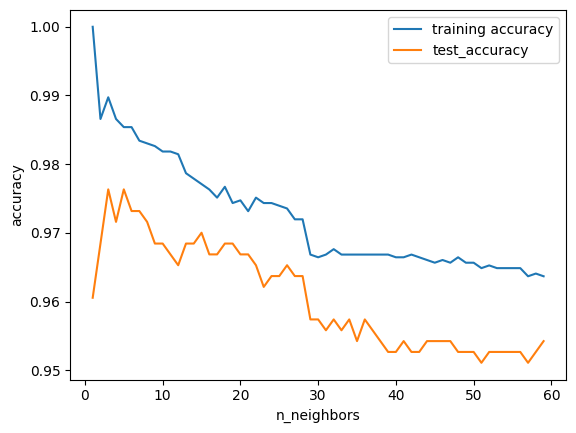

In [21]:
# Plotting
plt.plot(n_neighbors_settings, training_accuracy, label = 'training accuracy')
plt.plot(n_neighbors_settings, test_accuracy, label = 'test_accuracy')
plt.xlabel("n_neighbors")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [22]:
# Grid search for hyperparameter tuning
grid = {'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'metric' : ['euclidean', 'manhattan']}   # Define the hyperparameter grid
knn = KNeighborsClassifier()   # Create an KNN
knn_cv = GridSearchCV(knn, grid, cv = 5)   # Initialize GridSearchCV
knn_cv.fit(X_train_std,y_train)   # Fit the model to the training data

print("hyperparameters tuning: ", knn_cv.best_params_)
print("accuracy: {:.3f}".format(knn_cv.best_score_))

hyperparameters tuning:  {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
accuracy: 0.981


In [23]:
# Train KNN with N_neighbors = 3
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)
knn.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(knn.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(knn.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.990
Test set accuracy : 0.976
[[306   5]
 [ 10 313]]


In [24]:
# Cross-validation scores
scores = cross_val_score(knn, X_train_std, y_train, cv = 3)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 4)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 5)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 6)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 7)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 8)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 9)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

scores = cross_val_score(knn, X_train_std, y_train, cv = 10)
print("CV accuracy score : %s " %scores)
print('CV accuracy : %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

CV accuracy score : [0.97751479 0.97869822 0.98815166] 
CV accuracy : 0.981 +/- 0.005
CV accuracy score : [0.97634069 0.97791798 0.98104265 0.98894155] 
CV accuracy : 0.981 +/- 0.005
CV accuracy score : [0.97830375 0.97830375 0.97633136 0.98816568 0.98616601] 
CV accuracy : 0.981 +/- 0.005
CV accuracy score : [0.98108747 0.97635934 0.97867299 0.97867299 0.992891   0.98341232] 
CV accuracy : 0.982 +/- 0.005
CV accuracy score : [0.98618785 0.96961326 0.97790055 0.97790055 0.97513812 0.99171271
 0.98342541] 
CV accuracy : 0.980 +/- 0.007
CV accuracy score : [0.9873817  0.96529968 0.97476341 0.97791798 0.97791798 0.98422713
 0.99367089 0.98101266] 
CV accuracy : 0.980 +/- 0.008
CV accuracy score : [0.9893617  0.96808511 0.9751773  0.9787234  0.9858156  0.96797153
 0.98932384 0.98932384 0.98220641] 
CV accuracy : 0.981 +/- 0.008
CV accuracy score : [0.99212598 0.96456693 0.98031496 0.97637795 0.97233202 0.98023715
 0.98023715 0.99209486 0.98814229 0.98418972] 
CV accuracy : 0.981 +/- 0.008


In [25]:
# Train KNN with N_neighbors = 5
knn = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 5)
knn.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = knn.predict(X_train_std)
y_test_pred = knn.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(knn.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(knn.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 0.985
Test set accuracy : 0.976
[[305   6]
 [  9 314]]


# 7. Voting

In [26]:
# Create individual classifiers
svm_clf = SVC(kernel = 'rbf', C = 1000, gamma = 1, random_state = 42)
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
knn_clf = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)
log_clf = LogisticRegression()

# Train Hard Voting
voting_clf = VotingClassifier(estimators = [('knn', knn_clf), ('tree', tree_clf), ('svc', svm_clf), ('log', log_clf)], voting = 'hard')
voting_clf.fit(X_train_std, y_train)

# Evaluate each classifier
for clf in (knn_clf, tree_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print(clf.__class__.__name__, '{:.3f}'.format(accuracy_score(y_test, y_pred)))


KNeighborsClassifier 0.976
DecisionTreeClassifier 0.962
SVC 0.973
LogisticRegression 0.968
VotingClassifier 0.975


In [27]:
# Create individual classifiers
svm_clf = SVC(kernel = 'linear', C = 1000, gamma = 1, random_state = 42, probability = True)
tree_clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)
knn_clf = KNeighborsClassifier(metric = 'euclidean', n_neighbors = 3)
log_clf = LogisticRegression()

# Train Soft Voting
voting_clf = VotingClassifier(estimators = [('knn', knn_clf), ('tree', tree_clf), ('svc', svm_clf), ('log', log_clf)], voting = 'soft')
voting_clf.fit(X_train_std, y_train)

# Evaluate each classifier
for clf in (knn_clf, tree_clf, svm_clf, log_clf, voting_clf):
    clf.fit(X_train_std, y_train)
    y_pred = clf.predict(X_test_std)
    print(clf.__class__.__name__, '{:.3f}'.format(accuracy_score(y_test, y_pred)))


KNeighborsClassifier 0.976
DecisionTreeClassifier 0.962
SVC 0.973
LogisticRegression 0.968
VotingClassifier 0.978


# 8. Random Forest


In [28]:
# Train Random Forest
clf = RandomForestClassifier(n_estimators = 500, max_depth = 3, random_state = 42)
clf.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Training accuracy Score : {:.3f}".format(accuracy_score(y_train, y_train_pred)))
print("Test accuracy Score : {:.3f}".format(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy Score : 0.973
Test accuracy Score : 0.968
[[302   9]
 [ 11 312]]


feature importances:
 [0.49404686 0.30940097 0.00711681 0.05667559 0.11185351 0.00489908
 0.01600718]


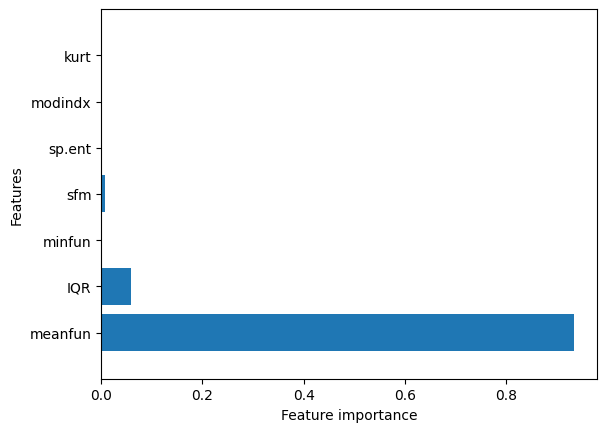

In [29]:
# Plot feature importances for a given model
def plot_feature_importances_credit(model):
    n_features = X_train.shape[1]
    plt.barh(np.arange(n_features),model.feature_importances_, align = 'center')
    plt.yticks(np.arange(n_features),X_train.columns[0:])
    plt.xlabel("Feature importance")
    plt.ylabel("Features")
    plt.ylim(-1, n_features)

print("feature importances:\n", clf.feature_importances_)
plot_feature_importances_credit(dtc)

# 9. Gradient Boosting

In [30]:
# Train Gradient Boosting
gbrt = GradientBoostingClassifier(random_state = 42)
gbrt.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = gbrt.predict(X_train_std)
y_test_pred = gbrt.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Training accuracy Score : {:.3f}".format(gbrt.score(X_train_std,y_train)))
print("Test accuracy Score : {:.3f}".format(gbrt.score(X_test_std,y_test)))
print(conf)

Training accuracy Score : 0.994
Test accuracy Score : 0.970
[[305   6]
 [ 13 310]]


# 10. XGBoost

In [31]:
# Train XGBoost
xgb = XGBClassifier()
xgb.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = xgb.predict(X_train_std)
y_test_pred = xgb.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Train set accuracy : {:.3f}".format(xgb.score(X_train_std, y_train)))
print("Test set accuracy : {:.3f}".format(xgb.score(X_test_std, y_test)))
print(conf)

Train set accuracy : 1.000
Test set accuracy : 0.970
[[303   8]
 [ 11 312]]


# 11. Bagging

In [32]:
# Train Bagging with Decision Tree base estimator
bag_cl = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_cl.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = bag_cl.predict(X_train_std)
y_test_pred = bag_cl.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print('Training accuracy score: %.3f'%(accuracy_score(y_train, y_train_pred)))
print('Test accuracy score: %.3f' %(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy score: 0.996
Test accuracy score: 0.973
[[305   6]
 [ 11 312]]


In [33]:
# Compute Out-Of-Bag score
bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)
bag_clf.fit(X_train_std, y_train)
print('oob score : {:.3f}'.format(bag_clf.oob_score_))

oob score : 0.977


In [34]:
# Train Bagging with KNN base estimator
bag_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_clf.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = bag_cl.predict(X_train_std)
y_test_pred = bag_cl.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print('Training accuracy score: %.3f'%(accuracy_score(y_train, y_train_pred)))
print('Test accuracy score: %.3f' %(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy score: 0.996
Test accuracy score: 0.973
[[305   6]
 [ 11 312]]


In [35]:
# Compute Out-Of-Bag score
bag_clf = BaggingClassifier(KNeighborsClassifier(), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)
bag_clf.fit(X_train_std, y_train)
print('oob score : {:.3f}'.format(bag_clf.oob_score_))

oob score : 0.981


In [36]:
# Train Bagging with SVM - RBF base estimator
bag_clf = BaggingClassifier(SVC(kernel = 'rbf', random_state = 42), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_clf.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = bag_cl.predict(X_train_std)
y_test_pred = bag_cl.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print('Training accuracy score: %.3f'%(accuracy_score(y_train, y_train_pred)))
print('Test accuracy score: %.3f' %(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy score: 0.996
Test accuracy score: 0.973
[[305   6]
 [ 11 312]]


In [37]:
# Compute Out-Of-Bag score
bag_clf = BaggingClassifier(SVC(kernel = 'rbf', random_state = 42 ), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)
bag_clf.fit(X_train_std, y_train)
print('oob score : {:.3f}'.format(bag_clf.oob_score_))

oob score : 0.973


In [38]:
# Train Bagging with SVM - Linear base estimator
bag_cl = BaggingClassifier(SVC(kernel = 'linear', random_state = 1), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_cl.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = bag_cl.predict(X_train_std)
y_test_pred = bag_cl.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print('Training accuracy score: %.3f'%(accuracy_score(y_train, y_train_pred)))
print('Test accuracy score: %.3f' %(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy score: 0.974
Test accuracy score: 0.973
[[302   9]
 [  8 315]]


In [39]:
# Compute Out-Of-Bag score
bag_clf = BaggingClassifier(SVC(kernel = 'linear',random_state = 1 ), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)
bag_clf.fit(X_train_std, y_train)
print('oob score : {:.3f}'.format(bag_clf.oob_score_))

oob score : 0.976


In [40]:
# Train Bagging with Logistic Regression base estimator
bag_cl = BaggingClassifier(LogisticRegression(), n_estimators = 500, max_samples = 0.6, bootstrap = True)
bag_cl.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = bag_cl.predict(X_train_std)
y_test_pred = bag_cl.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print('Training accuracy score: %.3f'%(accuracy_score(y_train, y_train_pred)))
print('Test accuracy score: %.3f' %(accuracy_score(y_test, y_test_pred)))
print(conf)

Training accuracy score: 0.970
Test accuracy score: 0.967
[[298  13]
 [  8 315]]


In [41]:
# Compute Out-Of-Bag score
bag_clf = BaggingClassifier(LogisticRegression(), n_estimators = 500, bootstrap = True, n_jobs = -1, oob_score = True, random_state = 40)
bag_clf.fit(X_train_std, y_train)
print('oob score : {:.3f}'.format(bag_clf.oob_score_))

oob score : 0.971


# 12. AdaBoost

In [42]:
# Train AdaBoost
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 1), n_estimators = 200, algorithm = "SAMME.R", learning_rate = 0.5, random_state = 42)
ada_clf.fit(X_train_std, y_train)

# Predictions on training and test sets
y_train_pred = ada_clf.predict(X_train_std)
y_test_pred = ada_clf.predict(X_test_std)

# Confusion matrix
conf = confusion_matrix(y_true = y_test, y_pred = y_test_pred)

print("Training accuracy Score : {:.3f}".format(ada_clf.score(X_train_std,y_train)))
print("Test accuracy Score : {:.3f}".format(ada_clf.score(X_test_std,y_test)))
print(conf)

Training accuracy Score : 0.990
Test accuracy Score : 0.970
[[302   9]
 [ 10 313]]


# 13. Conclusison

In [43]:
acc = [0.968, 0.966, 0.981, 0.982, 0.968, 0.970, 0.973, 0.970]
models = ['Logistic', 'Tree', 'SVM', 'KNN', 'Random Forest', 'XGBoost', 'Bagging', 'AdaBoost']

<ipython-input-44-4cde6a79a268>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use(['seaborn-whitegrid'])


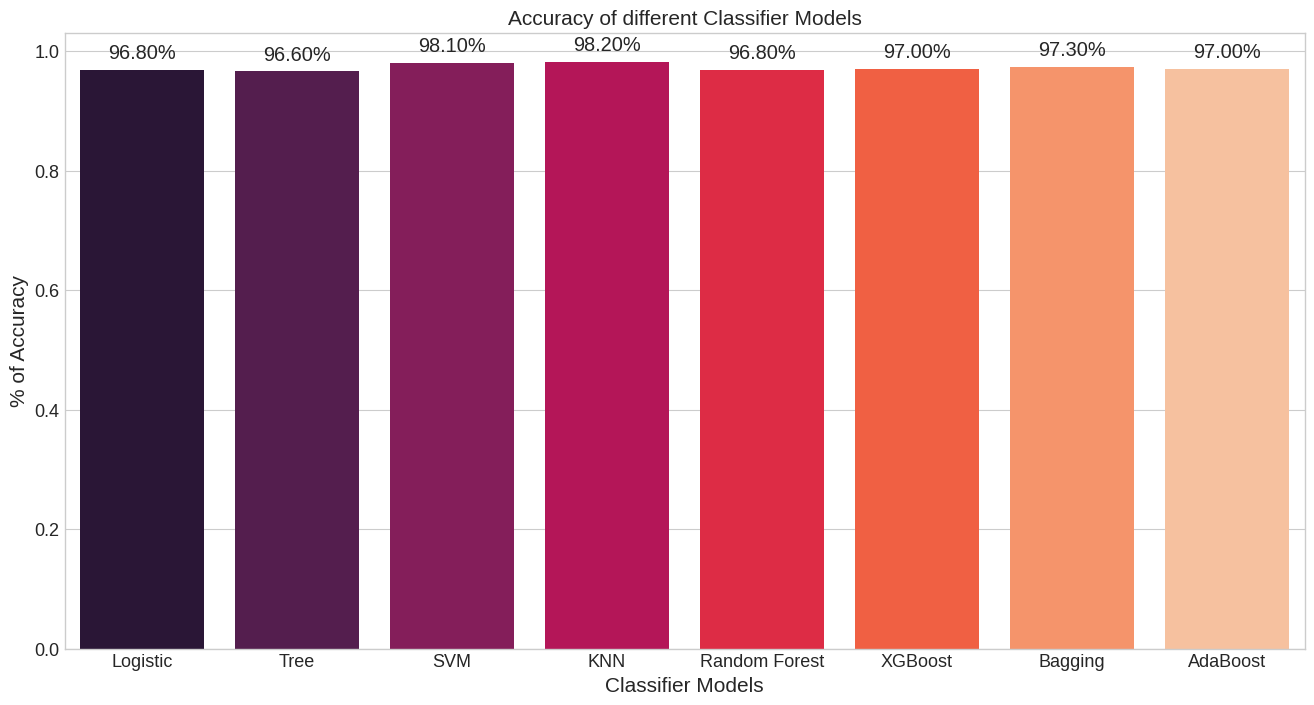

In [44]:
plt.rcParams['figure.figsize'] = 16, 8
plt.style.use(['seaborn-whitegrid'])
ax = sns.barplot(x = models, y = acc, palette = "rocket", saturation = 1.5)
plt.xlabel("Classifier Models", fontsize = 15 )
plt.ylabel("% of Accuracy", fontsize = 15)
plt.title("Accuracy of different Classifier Models", fontsize = 15)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width / 2, y + height * 1.02), ha = 'center', fontsize = 'x-large')

plt.show()